## Example 11a: The setup of the SALSA component, SalsaProfile plot, SalsaTimeSeries plot, and SalsaContourPlot.

This example demonstrates the use of the SALSA component in the control file interface of NRAP-Open-IAM. It also demonstrates the use of three plot types: the SalsaProfile, SalsaTimeSeries, and SalsaContourPlot plot types.

Before this example can be run, one needs to have the OpenIAMEnv environment activated (environment containing the python libraries required to run NRAP-Open-IAM). For example, one can open Anaconda Prompt, use the command "conda activate OpenIAMEnv" to activate the environment (if it is named OpenIAMEnv), navigate to the directory for NRAP-Open-IAM, and then use the command "jupyter notebook" to open Jupyter Notebook from that directory and within that environment. Then, the jupyter notebook examples will have access to the Python libraries within NRAP-Open-IAM environment.

This example is a modified version of control file 62a. In this example, the user only needs to set up a SALSA component. While a standard NRAP-Open-IAM simulation will have separate reservoir, wellbore, and aquifer components, SALSA does not connect with other components. The responses of reservoir(s), aquifers, aquitards, and leaking wells are all simulated by SALSA.

First, we review the different sections of the .yaml control file. Control files typically use the pound symbol followed by hyphens (#---) to mark separate sections, but these characters are not required. Any symbols following a pound symbol (#) will be ignored by the Python script that reads the .yaml file, so the hyphens are only there as a visual aid.

Every control file must have a section called 'ModelParams'. In this section, one specifies the model times to assess ('EndTime: 100.0' and 'TimeStep: 10.0', times are in years), the type of analysis to conduct (i.e., deterministic or stochastic, controlled by the 'Analysis' entry), the names of the components included in the system model ('Components'), and the output directory to save the output ('OutputDirectory'). Here, the analysis type is forward ('Analysis: forward'). This analysis type is deterministic, which means that the simulation output will be the same after each model run (as opposed to a stochastic simulation, where results vary). Because only the SALSA component is required here, the 'Components' entry is given a list that only contains the name of the SALSA component ('Components: [SalsaComp]'). The 'Logging' input of 'Error' specifies that information about the status of the simulation will be limited to error messages; these messages will be displayed and saved to a file ('IAM_log.log').

Next, the control file must include a section for a stratigraphy component. While this section is required in a control file, the SALSA component does not connect with the NRAP-Open-IAM stratigraphy component. Instead, the stratigraphy information will be handled internally through parameters given directly to the SALSA component.

The 'Stratigtraphy' section is only included here because the control file interface will raise an error if the file lacks a 'Stratigraphy' section. Even though the Stratigraphy section will not be used, certain parameters are provided here to prevent the simulation from printing warning statements saying that the parameters were not provided.

The input for the SALSA component is entered under the section entitled 'SalsaComp'. Because that section title is used, the SALSA component will be named 'SalsaComp'. The componnet type is specified with the entry 'Type: SALSA'. There are six other entries indented under the component name: 'InjectionWell', 'LeakingWell', 'OutputLocations', 'ContourPlot', 'Parameters', and 'Outputs'. Each of these subsections contain more inputs.

The 'InjectionWell' section is used to define the locations of all injection and extraction wells. SALSA allows the use of injection and extraction wells, but both types are referred to as active wells. The easting (x) and northing (y) coordinates for active wells are given in meters with the 'activeWellCoordx' and 'activeWellCoordy' entries. Here, there is one active well at x = 2000 $m$, y = 0 $m$.

Additionally, the 'periodEndTimes' keyword argument under 'InjectionWell' specifies the times (in years) at which injection or extraction rates change. Here, the input given for 'periodEndTimes' is a list containing two comma-separated values. A list is given in brackets ('[]'), so the input of 'periodEndTimes: [50, 100]' specifies the years 50 and 100. Injection period one ends at the first time in periodEndTimes (50 years), while the injection period two ends at the second entry in periodEndTimes (100 years). The injection rates for each period are given with parameters discussed further below.

The 'LeakingWell' section is used to define the locations of all leaking wells. The x and y coordinates for leaking wells are given in meters with the 'leakingWellCoordx' and 'leakingWellCoordy' entries. Here, there is one leaking well at x = 1990 $m$, y = 0 $m$ (i.e., 10 $m$ away from the injection well).

The output locations for hydraulic head and pressure observations are given under 'OutputLocations'. Observations in aquifers and shales are taken at separate locations defined by x and y coordiantes (in meters). The x and y values for aquifer observations are given with 'aquiferCoordx' and 'aquiferCoordy', while the x and y values for shle observations are given with 'shaleCoordx' and 'shaleCoordy'. These coordiantes are given separately for aquifers and shales because the collection of observations is handled differently for each unit type. For example, hydraulic head is collected in a shale using multiple points spaced across the shale's thickness; hydraulic head can vary across the thickness of the shale. The number points extending across each shale is set with the 'numberOfVerticalPoints' entry in the 'Parameters' section. Conversely, hydraulic head is collected as one value for each 'aquiferCoordx' and 'aquiferCoordy' location; hydraulic head is uniform across the thickness of an aquifer, but it can vary with horizontal distance across the aquifer.

The section 'ContourPlot' allows the user to specify which aquifers will be included in the contour plot output. The contour plot outputs show how hydraulic head or pressure vary in aquifers over space. These results will be saved for each aquifer number included in the 'aquiferNamesContourPlots' input. Here, 'aquiferNamesContourPlots' is given as '[1, 2]', so gridded outputs will be saved for aquifers 1 and 2. These results can be displayed in map-view figures using the 'SalsaContourPlot', which is discussed further below.

The section 'Parameters' is used to specify a wide range of inputs for the SALSA component. For example, the stratigraphy for the SALSA component is defined with the parameters 'numberOfShaleLayers', 'shale#Thickness', 'aquifer#Thickness', 'bottomLayerType', and 'topLayerType'. Here, the '#' symbol should be replaced with specific unit numbers (e.g., shale1Thickness and aquifer2Thickness). The stratigraphy used has alternating shale and aquifer layers. If a particular unit is not given a thickness by the user, it will resort to the default thickness value for that unit type (250 m for shales, 100 m for aquifers). The parameters 'bottomLayerType' and 'topLayerType' specify the unit type (shale or aquifer) of the bottom and top layers, respectively. For 'bottomLayerType' and 'topLayerType', 0 represents a shale unit while a 1 represents an aquifer. If these parameters are not given, the default value for both parameters is 0 (shale). The number of aquifer layers is calculated as 'numberOfShaleLayers' + 'bottomLayerType' + 'topLayerType' - 1. This simulation uses two aquifers (3 + 0 + 0 - 1). Because the 'bottomLayerType' is 0, shale 1 will be the lowest unit depicted, aquifer 1 will be on top of shale 1, and shale 2 will be on top of aquifer 1.

The vertical and horizontal hydraulic conductivities of shales and aquifers are given in log$_{10}$ $m/s$ with the parameters 'shale#LogVertK' and 'aquifer#LogHorizK', respectively, where the '#' symbol is replaced with a specific unit number (e.g., 'aquifer1LogHorizK: -6.46', specifying 10$^{-6.46}$ $m/s$ for aquifer 1).

The initial hydraulic head in each aquifer is given in meters with the 'aquifer#Head' parameter. Here, aquifers 1 and 2 have initial hydraulic heads of 70.63 $m$ and 36.48 $m$, respectively.

The boundary conditions at the bottom and top of the represented stratigraphy are defined with the 'bottomBoundaryCond' and 'topBoundaryCond' parameters. A value of 1 specifies a no-flow boundary, while a value of 0 specifies a fixed-head boundary. Here, the bottom boundary (i.e., beneath shale 1) is a no-flow boundary, while the top boundary (i.e., above shale 3, at the ground surface) is a fixed-head boundary. If the bottom or top boundary uses a fixed hydraulic head, that hydraulic head value is defined in meters with the 'bottomBoundaryHead' or 'topBoundaryHead' parameter, respectively.

The hydraulic conductivities of leaking wells are given in log$_{10}$ $m/s$ with the parameters 'leakingWell#LogKShale#' 'leakingWell#LogKAquifer#'. The hydraulic conductivity for each leaking well can vary across each stratigraphic unit. For these parameters, the leaking well is specified with the well index ('leakingWell1') while the aquifer or shale is specified with the unit index (e.g., 'Shale1' or 'Aquifer1'). Here, the leaking well has a hydraulic conducitivty of 10$^{-5.5}$ $m/s$ in each unit. This same approach is used to specify the radius (in meters) of each leaking well across each shale and aquifer with the parameters 'leakingWell#RadiusShale#' and 'leakingWell#RadiusAquifer#'. Here, the leaking well has a uniform radius of 0.15 $m$ across each unit.

The injection or extraction rate of each active well into each aquifer and during each injection period is given in $m^3/s$ with the parameter 'activeWell#QAquifer#Period#'. Injection rates are given with positive values, while extraction rates are given with negative values. Here, the entry 'activeWell1QAquifer1Period1: 0.00966' specifies that aquifer 1 has an injection rate of 0.00966 $m^3/s$ during injection period 1 (years 0 to 50). Aquifer 2 does not receive injection, and all injection rates are 0 $m^3/s$ in injection period 2 (years 50 to 100). The radius of each active well across each aquifer is defined with the parameter 'activeWell#RadiusAquifer#'. Here, the active well has a radius of 0.1 $m$ across aquifers 1 and 2 (e.g., 'activeWell1RadiusAquifer2: 0.1').

There are more parameters that are not shown here. For example, each legacy well can be made cased or uncased across each aquifer with the parameter 'legacyWell#StatAquifer#' (with values of 1 and 0 for cased and screened, respectively). To see all of the parameters for the SALSA component, see the NRAP-Open-IAM user guide.

The 'Outputs' entry takes a list of all observations that will be saved by the SALSA component ('Outputs: [headLoc1Aquifer1, headLoc2Aquifer2, ...]'). For example, the hydraulic head in aquifer 2 at the first 'aquiferCoordx' and 'aquiferCoordy' location is requested by including 'headLoc1Aquifer2'. The leakage rate of leaking well 1 (the first 'leakingWellCoordx' and 'leakingWellCoordy' entry) into aquifer 2 is requested by including 'well1LeakageVolumeAquifer2'.

SALSA can also produce volumetric leakage rates and cumulative leakage volumes due to diffuse leakage across aquifer-aquitard interfaces. These outputs can be obtained for the interface along the bottom or top of each aquifer (e.g., 'diffuseLeakageRateBottomAquifer1' and 'diffuseLeakageRateTopAquifer1', for the rates at the bottom and top interfaces of aquifer 1).

For more details regarding the outputs of the SALSA component, see the NRAP-Open-IAM user guide.

Finally, there is a 'Plots' section. Each entry directly indented under 'Plots' is a separate plot entry.

Two of the plot entries ('Diffuse_Leakage_Rate' and 'Indiv_Well_Leakage_Vol') will make time series plots because they have 'TimeSeries' indented under the plot name. The observations shown in the plots are included in the list given after 'TimeSeries' (e.g., 'TimeSeries: [well1LeakageVolumeAquifer1, well1LeakageVolumeAquifer2]').

There are three plot types that are specifically meant to be used with the SALSA component: 'SalsaProfile', 'SalsaTimeSeries', and 'SalsaContourPlot'. All three of these plot types are demonstrated here. The output type shown in each figure is specified with the 'MetricType' entry. If 'MetricType' is given as head ('MetricType: head') the plot will show hydraulic head output. If MetricType is given as pressure ('MetricType: pressure'), the plot will show pressure output. The default setting is head.

The code below will run the simulation. Note that this simulation take some time to run (e.g., about five minutes). The output will be saved to a folder called 'output_ex62a_jupyter' in the 'output' folder of the NRAP-Open-IAM directory. The control file interface will print messages regarding the status of the simulation (e.g., 'Running file' or 'Analysis completed'). After the main simulation is complete, NRAP-Open-IAM will continue to create figures. The figures will be placed in the 'output_62a_jupyter' folder in the output directory of the NRAP-Open-IAM installation. Once the figure creation has finished, the code below will print the statement 'Finished'. 

In [1]:
import sys
import os
from datetime import datetime

# Add the source folder to the path
sys.path.insert(0, os.sep.join(['..', '..', 'src']))

# Name of the control file
file_name = 'ControlFile_ex62a_jupyter.yaml'

file_path = os.path.join(os.getcwd(), '..', 'Control_Files', 
                         'examples_for_jupyter_notebook', file_name)

source_dir = os.path.join(os.getcwd(), '..', '..', 'src')

# Path to the file openiam_cf.py, which is used to run control files
run_file = os.path.join(source_dir, 'openiam', 'components', 'openiam_cf.py')

# Set up the command to run the control file. The command has the format 
# 'python /path/to/openiam_cf.py --file ControlFile_ex58e_jupyter.yaml'.
run_command = '"{0}" --file "{1}"'.format(
     run_file, file_path)

In [2]:
print('Running Control File example 62a...')

# Run the control file
%run -i $run_command

print('Finished.')

Running Control File example 62a...

Finished.


The simulation will create many figures. You can check the output folder ('output_ex62a_jupyter') to see when the figures are produced. If the figures have been produced, the code below loads all of the figures. Otherwise, it will print a statement saying that the figure could not be found.

The 'SalsaProfile' plot type shows the stratigraphic column with hydraulic head or pressure results across the shale units. Values are shown for for all model times, with time represented by the color of each line.

The 'SalsaTimeSeries' plot type shows time series plots of hydraulic head or pressure in the shales and aquifers. A set of plots is made for all aquifers, while another set of plots is made for all shales. For this plot type, the values in each unit are color labeled by depth.

The 'SalsaContourPlot' plot type creates map-view images of hydraulic head or pressure in one or more aquifers at each model time step.

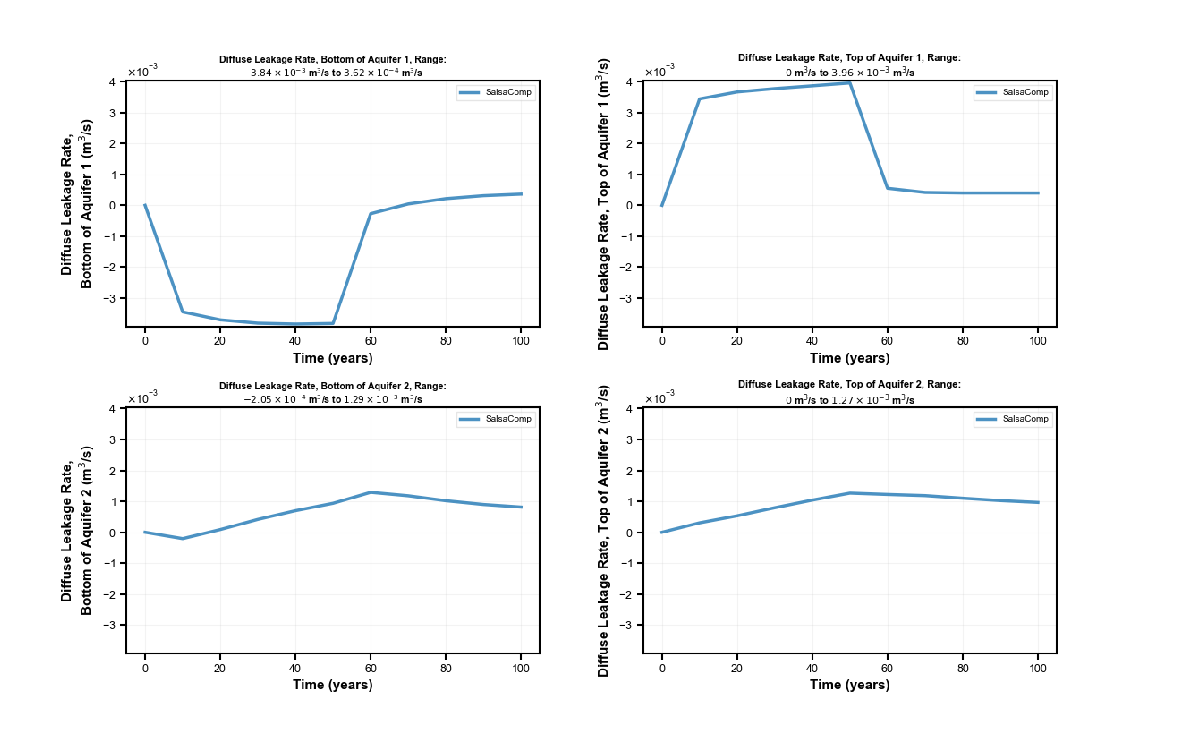

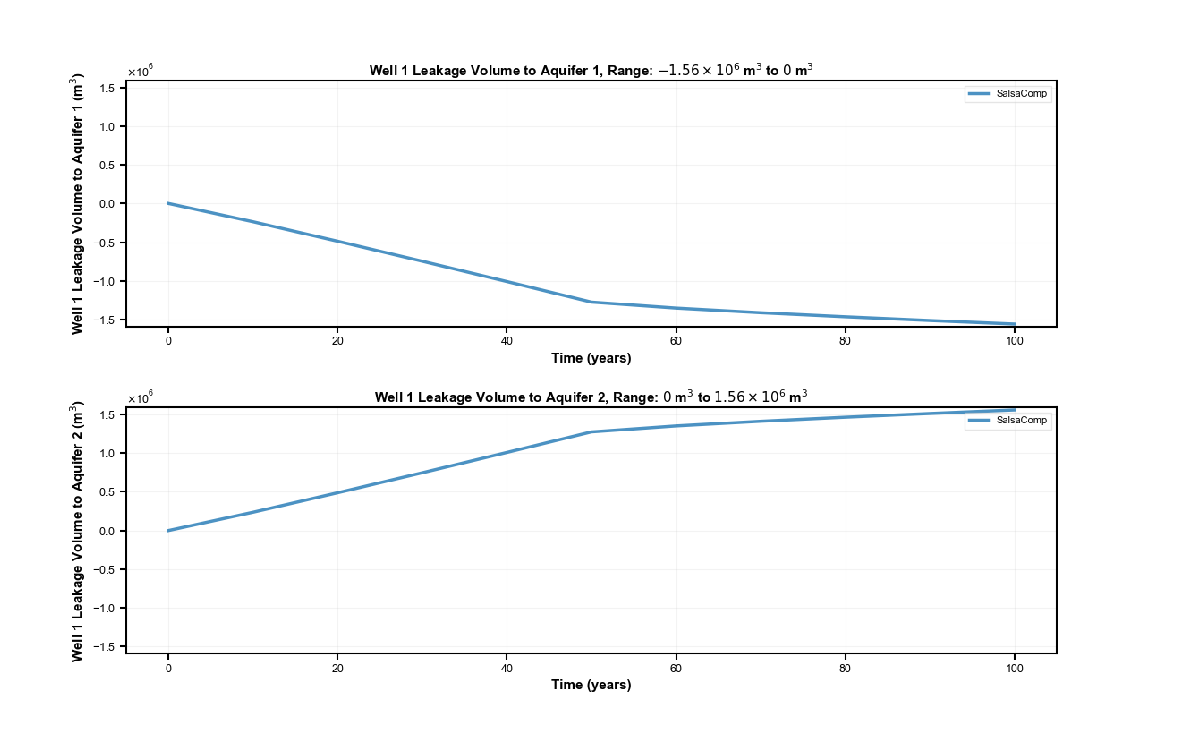

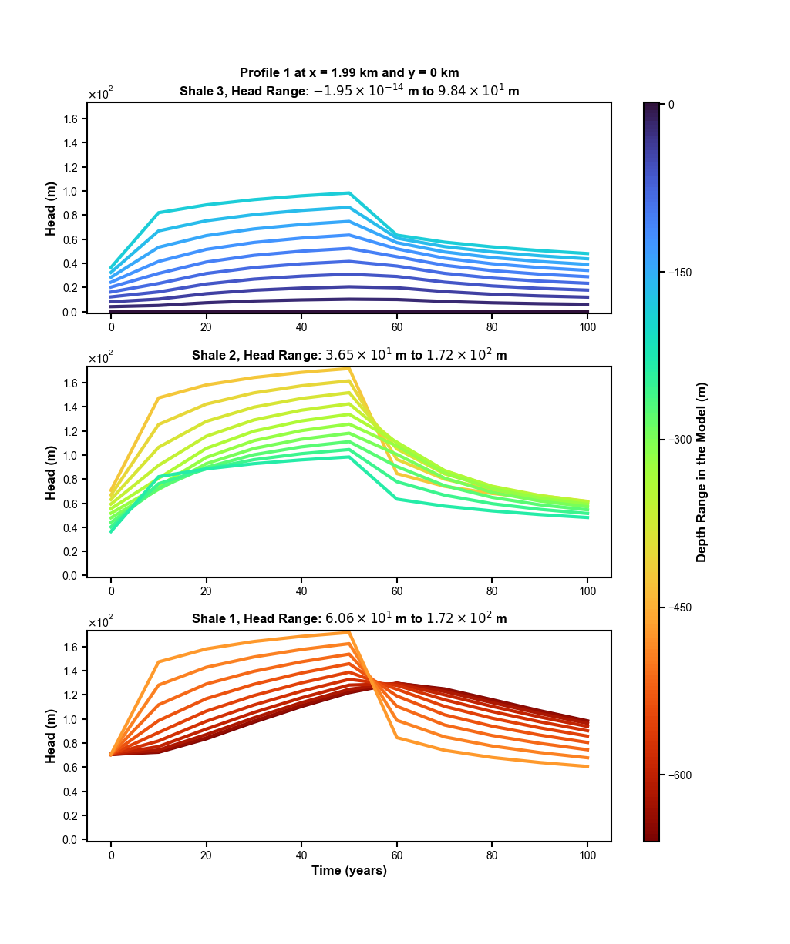

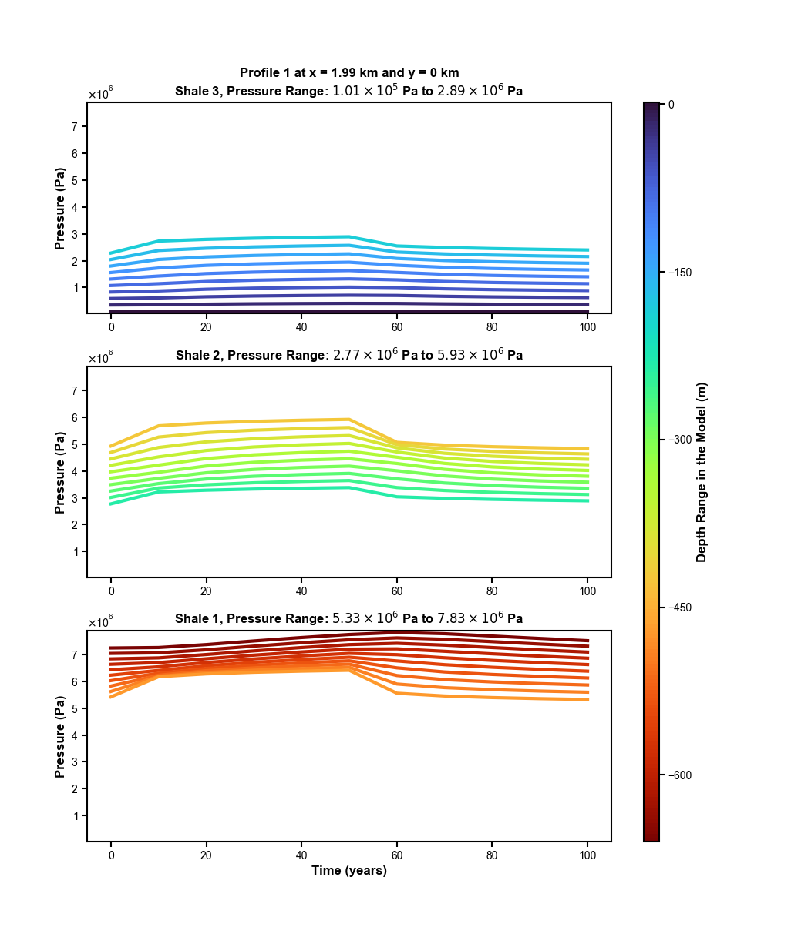

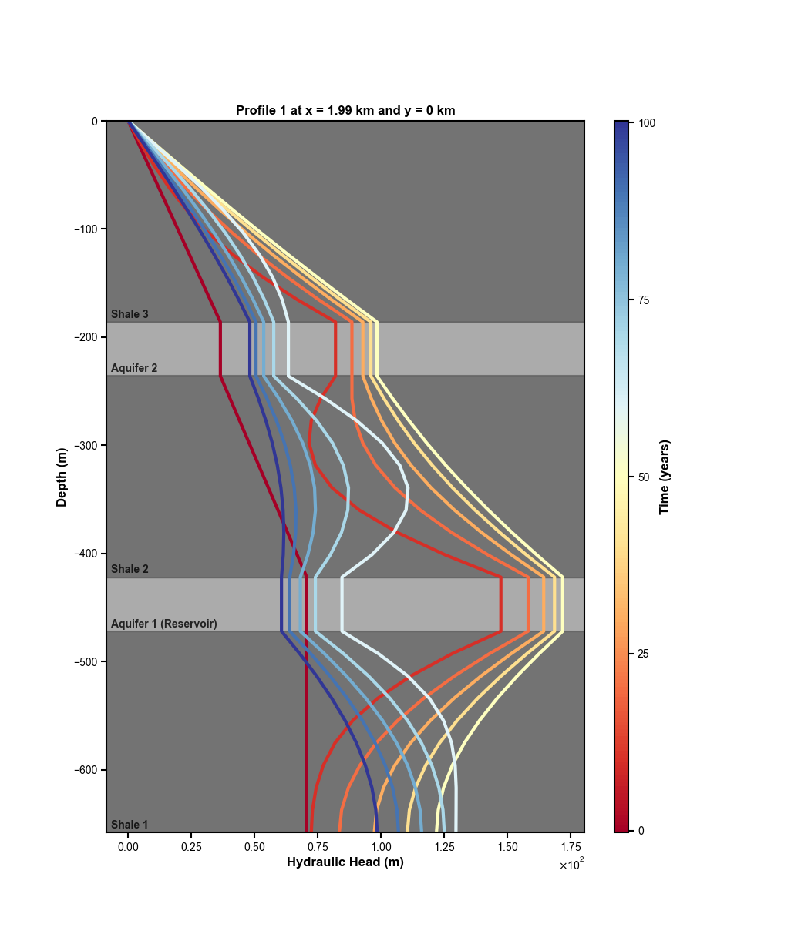

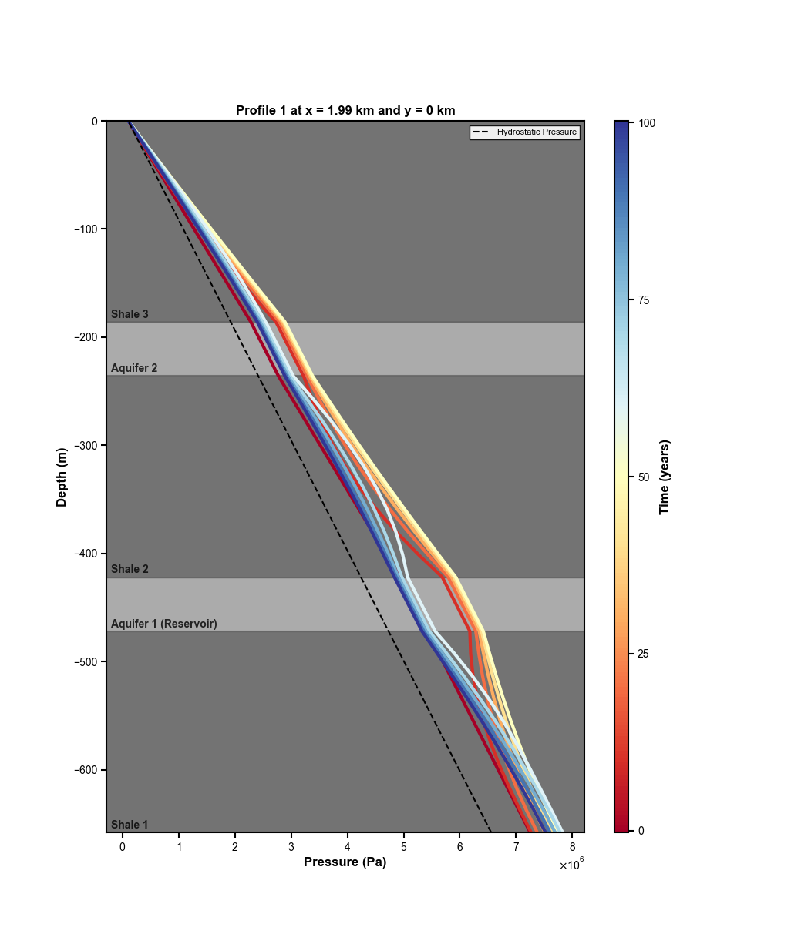

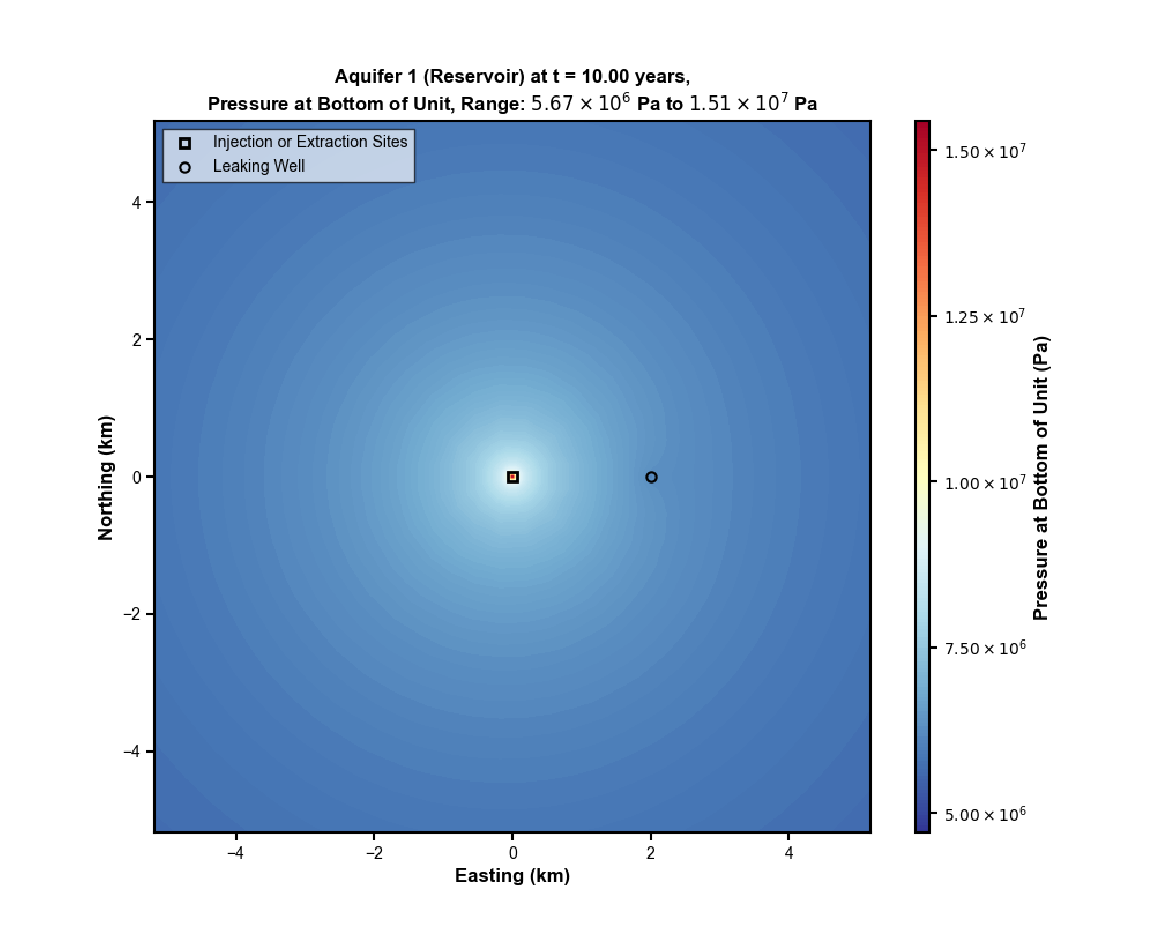

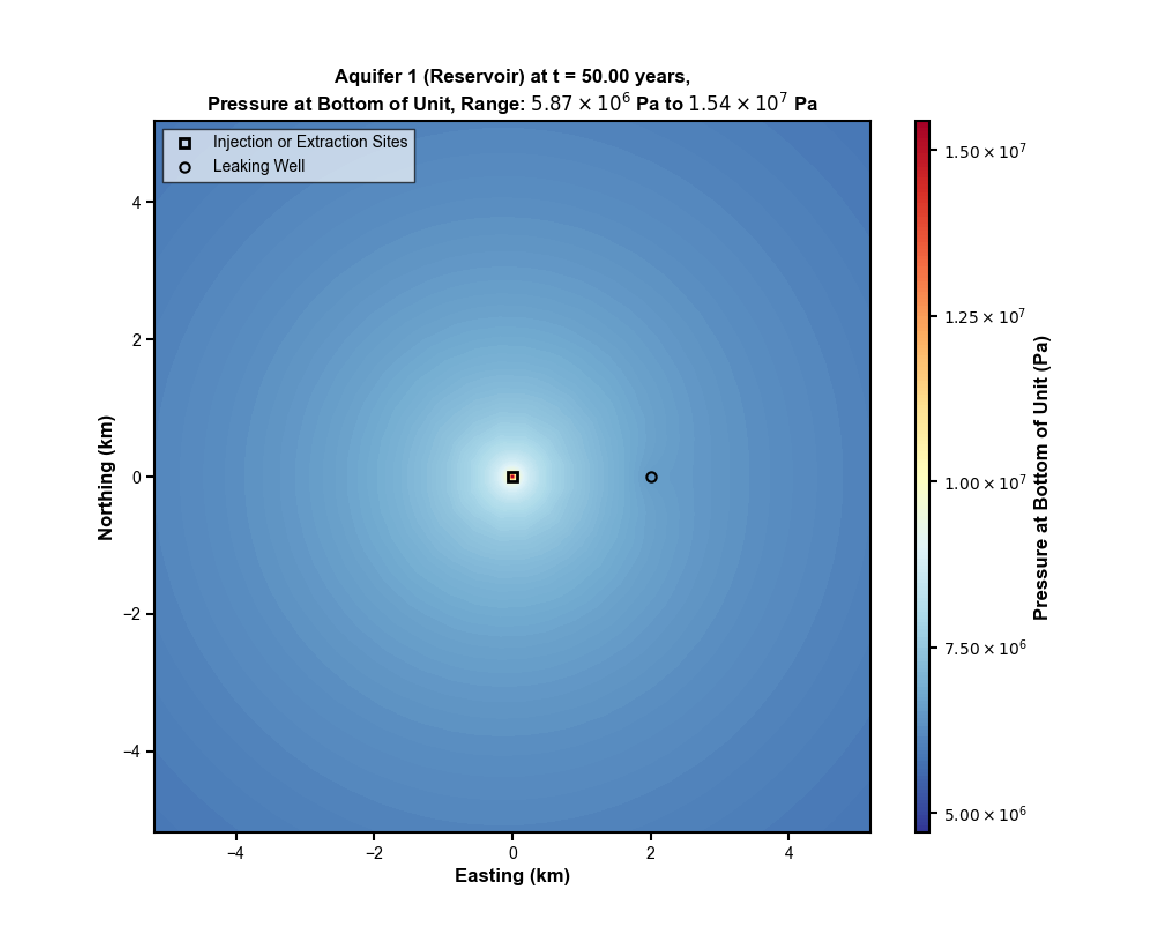

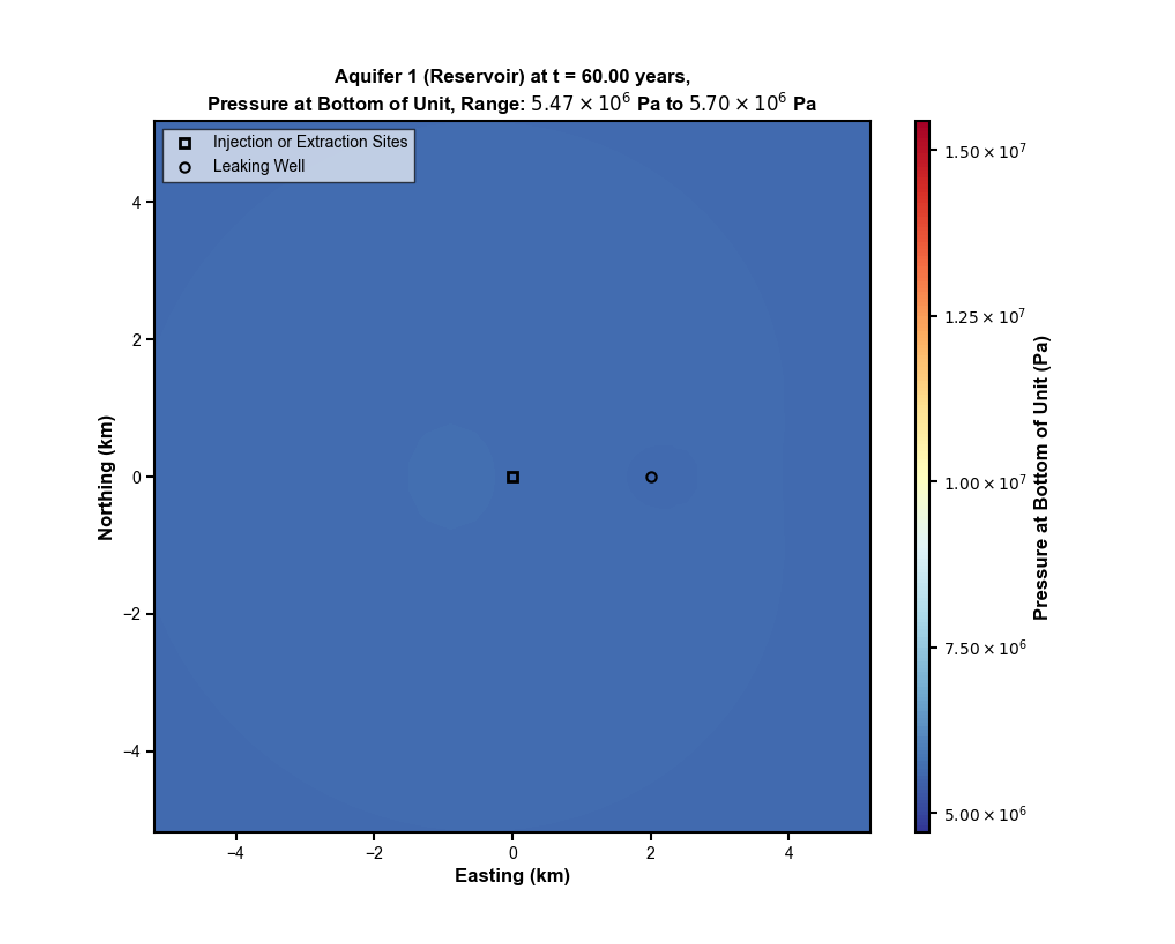

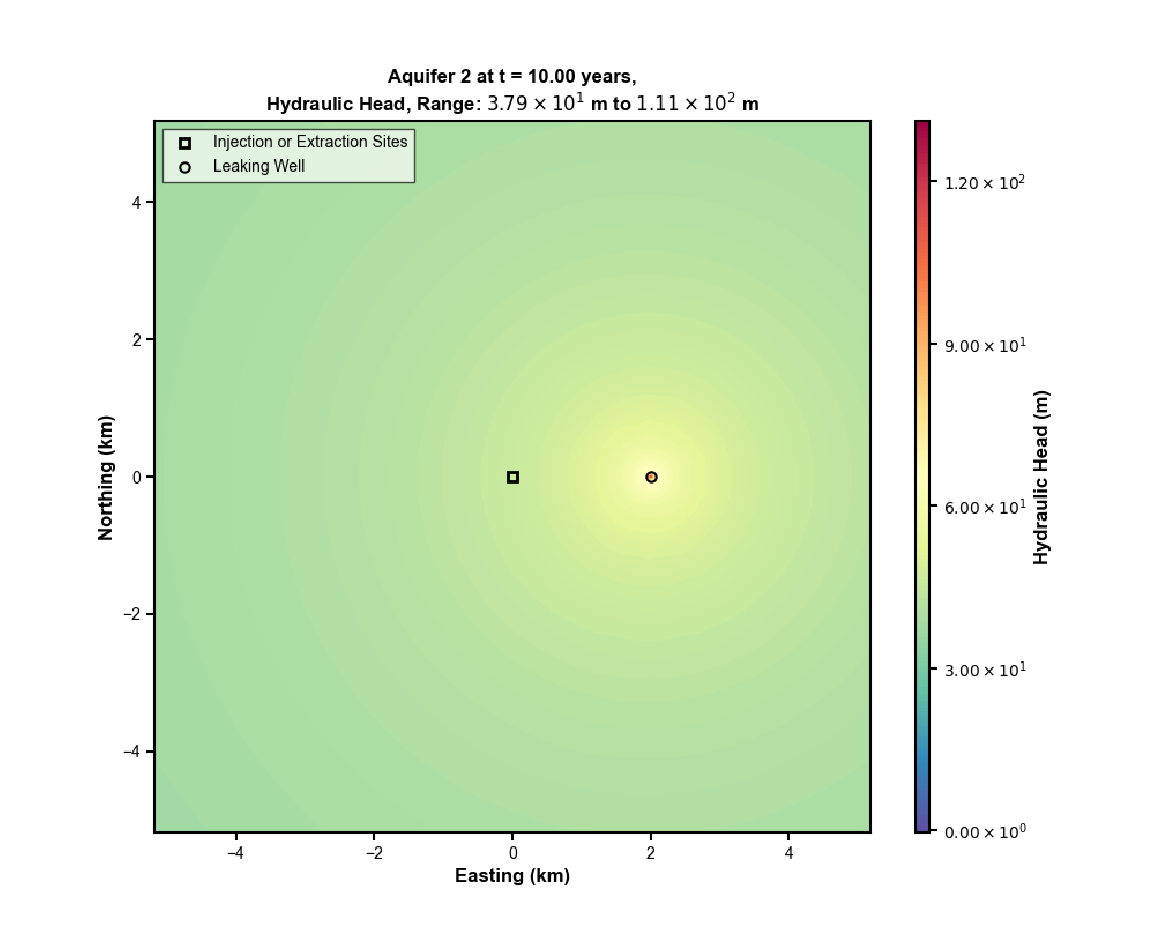

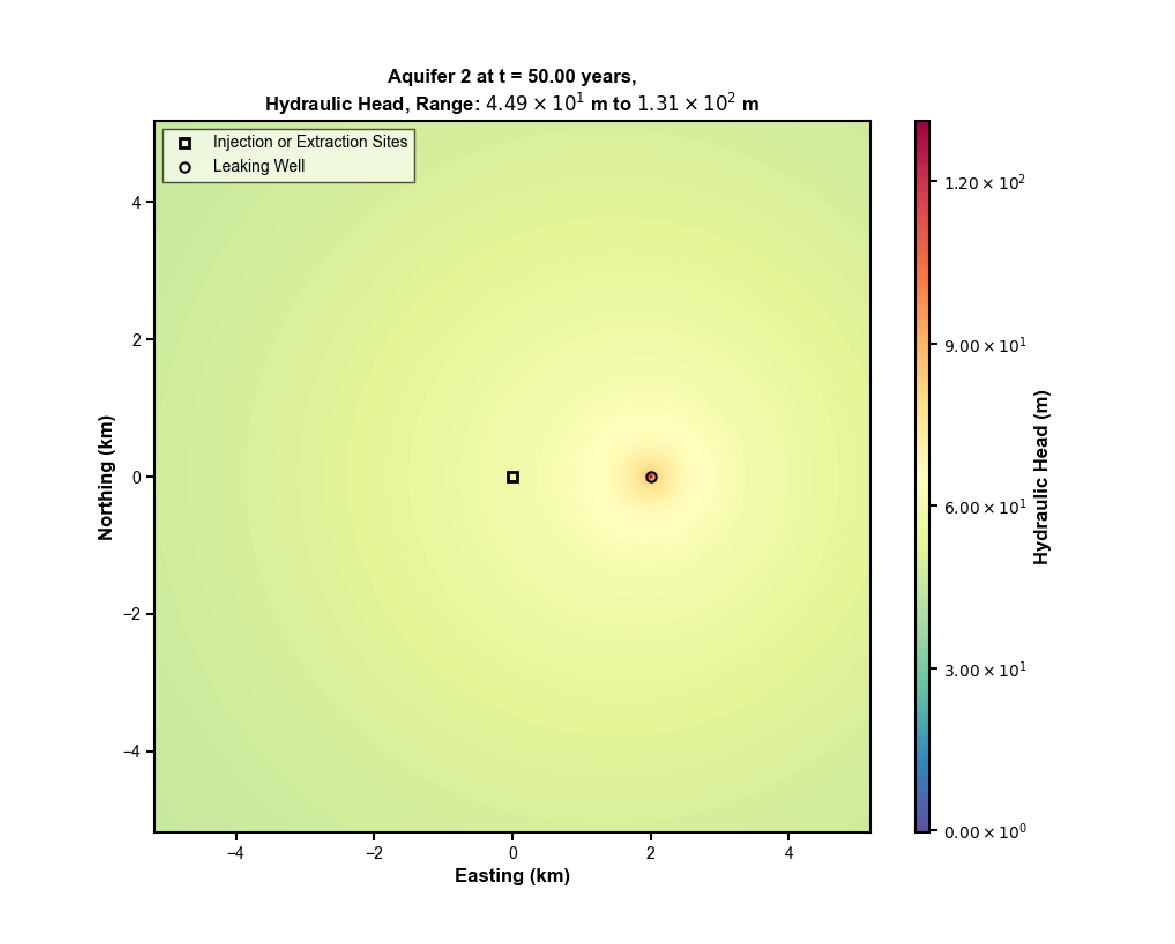

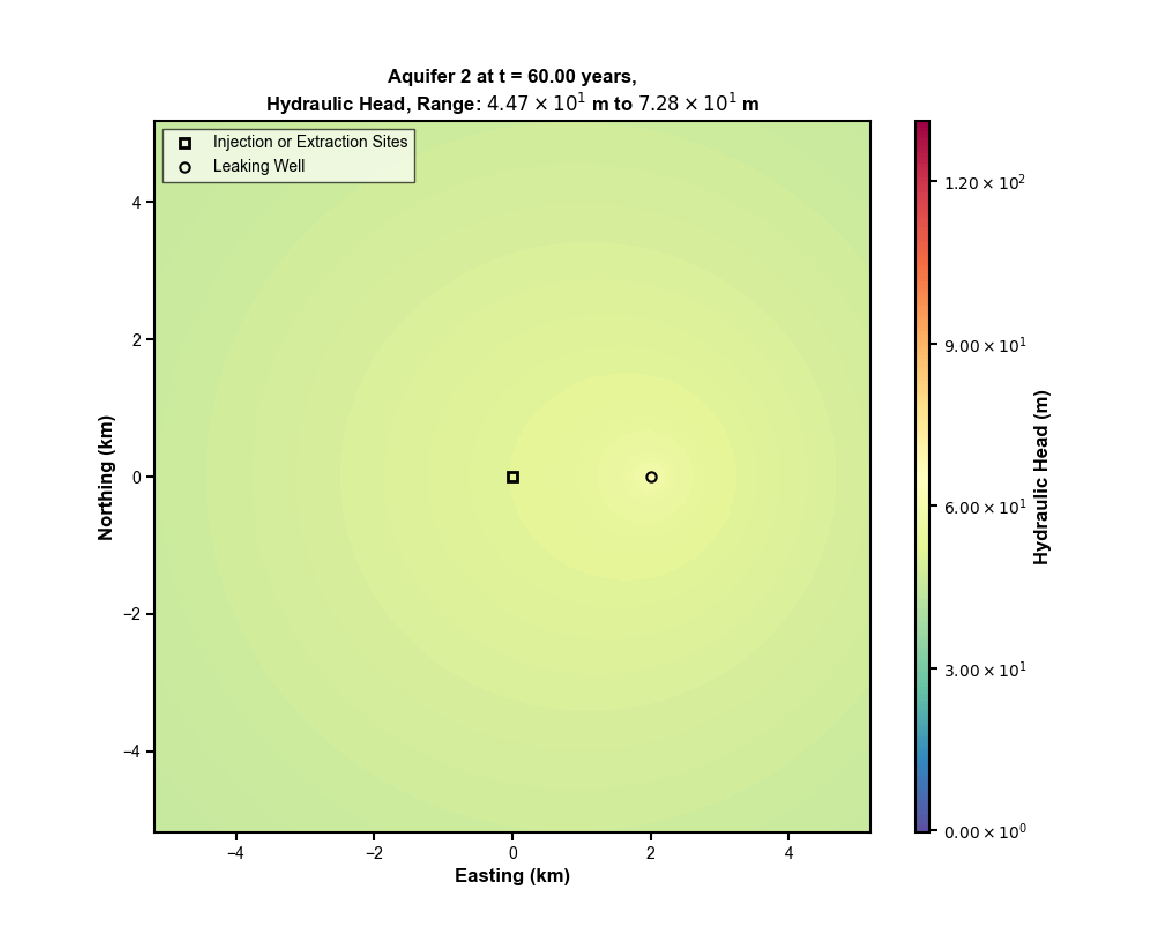

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

figure_names = ['Diffuse_Leakage_Rates.png', 
                'Indiv_Well_Leakage_Vol.png', 
                'Shale_Head_Time_Series_Profile_1.png', 
                'Shale_Pressure_Time_Series_Profile_1.png', 
                'Shales_Vertical_Head_Profile_1.png', 
                'Shales_Vertical_Pressure_Profile_1.png', 
                'SalsaContourPlot_Bottom_Pressure_Aquifer_1_tIndex_1.png', 
                'SalsaContourPlot_Bottom_Pressure_Aquifer_1_tIndex_5.png', 
                'SalsaContourPlot_Bottom_Pressure_Aquifer_1_tIndex_6.png', 
                'SalsaContourPlot_Head_Aquifer_2_tIndex_1.png', 
                'SalsaContourPlot_Head_Aquifer_2_tIndex_5.png', 
                'SalsaContourPlot_Head_Aquifer_2_tIndex_6.png'
               ]

example_output_directory = os.path.join(os.getcwd(), '..', '..', 'output', 'output_ex62a_jupyter')

for figRef, figName in enumerate(figure_names):
    file_path = os.path.join(example_output_directory, figure_names[figRef])
    
    check_for_figure = os.path.exists(file_path)
    
    if check_for_figure:
        img = mpimg.imread(file_path)
        
        fig = plt.figure(figRef + 1, figsize=(15, 12), dpi=100)
        ax = plt.gca()
        
        ax.imshow(img, interpolation='nearest')
        
        # We do not need the ticks from imshow, the figure file has its own ticks
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
        # We also do not need the spline added by imshow
        plt.setp(ax.spines.values(), alpha = 0)
    else:
        print('The figure {} was not found.'.format(file_path))

plt.show()

This example does not show all of the figures created by the simulation; to see all of the figures, go to the directory /output/output_ex62a_jupyter (where the output folder is in the main directory of the NRAP-Open-IAM installation). Furthermore, all results are saved to .csv files in the directory /output/output_ex62a_jupyter/csv_files.

Overall, the SALSA component is highly flexible and useful for many analyses related to geolgic carbon storage site planning and operation.